In [42]:
import pandas as pd
import scipy.signal
import numpy as np

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
basic_dir = 'C:\\Users\\TheurerJ\\Documents\\Data\\StrainStudy\\Dilation 3 Downsample 2'
plot_dir = 'C:\\Users\\TheurerJ\\Documents\\Data\\StrainStudy\\Plots with edits\\Double Peaking Limits'
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def calc_ratio(array,vid=None,save = True,window_size = 3,plot_dir = None,filename = None):
    if save:
        plt.clf()
        plt.plot(array,label = 'Raw Data',alpha=0.7)
    array = [array[0]]+array+[array[-1]]
    array = moving_average(array,window_size)
    if save:
        plt.plot(array,label = 'Moving Average: '+str(window_size),alpha=0.7)
    x = scipy.signal.find_peaks(-np.array(array),distance=32,width=5,prominence = 1)[0]
    y_array = scipy.signal.find_peaks(np.array(array),distance=32,width=5,prominence = 1)[0]
    ratios = []
    for i in range(0,len(x)):
        if i < len(y_array) and array[x[i]]<np.percentile(array,0.2):
            if save:
                plt.scatter(x[i],array[x[i]],color='green')
            #if i==len(x)-1:
            #    y = np.argmax(array[x[i]:])
            #else:
            #    
            delta = x[i]#16-(16-min([x[i],16]))
            y = y_array[i]#np.argmax(array[max([x[i]-16,0]):min([x[i]+16,len(array)])])
            if save:
                plt.scatter(y+x[i]-delta,array[y+x[i]-delta],color='red')
            x_val = array[x[i]]
            y_val = array[y+x[i]-delta]
            ratios.append(x_val/y_val)
    if save:
        #plt.legend()
        plt.savefig(os.path.join(plot_dir,filename[:-3]+'png'))
        plt.clf()
    ratios.sort()
    print(ratios)
    return ratios[1:-1]
import os
files = []
strains = []
 
for i in tqdm(os.listdir(os.path.join(basic_dir,'Excel'))):
    df = pd.read_csv(os.path.join(basic_dir,'Excel',i))
    x = calc_ratio(df.length.tolist(),plot_dir=plot_dir,filename = i)
    files.append(i)
    strains.append(x)

  1%|▉                                                                                 | 2/167 [00:00<00:15, 10.87it/s]

[0.8161025894323769]
[0.8169062039326974]
[0.7743430016633275]


  4%|██▉                                                                               | 6/167 [00:00<00:14, 11.35it/s]

[0.8310787806530884]
[0.8215677569916559]
[0.8130769140262861]


  5%|███▉                                                                              | 8/167 [00:00<00:13, 11.42it/s]

[0.8531778230413574]
[]
[0.846735137864277]


  6%|████▊                                                                            | 10/167 [00:00<00:16,  9.48it/s]

[0.8270204924475544]


  7%|█████▊                                                                           | 12/167 [00:01<00:15, 10.15it/s]

[]
[0.7990883480447727]
[0.8290684518050032]


 10%|███████▊                                                                         | 16/167 [00:01<00:13, 10.92it/s]

[]
[]
[0.802349771504176]


 11%|████████▋                                                                        | 18/167 [00:01<00:13, 11.06it/s]

[]
[]
[0.8727384691397838]


 13%|██████████▋                                                                      | 22/167 [00:01<00:13, 11.14it/s]

[0.8907805410793856]
[0.8468423631039504]
[]


 14%|███████████▋                                                                     | 24/167 [00:02<00:12, 11.06it/s]

[0.8182657624244561]
[0.7590286626903393]
[0.8009282712908377]


 16%|████████████▌                                                                    | 26/167 [00:02<00:12, 11.00it/s]

[0.8097117429553657]
[0.8121950096764893]


 18%|██████████████▌                                                                  | 30/167 [00:02<00:12, 11.00it/s]

[0.8295365383417816]
[0.7918795619190104]
[0.7974374364444702]


 19%|███████████████▌                                                                 | 32/167 [00:02<00:11, 11.57it/s]

[]
[]
[]


 20%|████████████████▍                                                                | 34/167 [00:03<00:11, 11.70it/s]

[0.8765353109386542]
[0.7993228075820483]


 23%|██████████████████▍                                                              | 38/167 [00:03<00:11, 11.14it/s]

[0.8721183977051848]
[0.8875196192817362]
[0.832685570340034]


 24%|███████████████████▍                                                             | 40/167 [00:03<00:11, 11.43it/s]

[0.8726403582230109]
[0.786325166643816]
[0.8646137633746432]


 26%|█████████████████████▎                                                           | 44/167 [00:03<00:10, 11.70it/s]

[0.8214642607088151]
[0.8246372999307485]
[]


 28%|██████████████████████▎                                                          | 46/167 [00:04<00:10, 11.80it/s]

[0.8187823095617475]
[0.7893097945941269]
[0.8060735598148497]


 30%|████████████████████████▎                                                        | 50/167 [00:04<00:10, 11.46it/s]

[]
[]
[]


 31%|█████████████████████████▏                                                       | 52/167 [00:04<00:10, 11.31it/s]

[0.8345887198325105]
[0.7630320674562641]
[0.8802131232372243]


 32%|██████████████████████████▏                                                      | 54/167 [00:04<00:10, 11.18it/s]

[]
[0.8138441951317295]


 35%|████████████████████████████▏                                                    | 58/167 [00:05<00:09, 11.45it/s]

[]
[0.822490982328381]
[]


 36%|█████████████████████████████                                                    | 60/167 [00:05<00:09, 11.58it/s]

[]
[0.8217371995703582]
[0.8321669695273897]


 37%|██████████████████████████████                                                   | 62/167 [00:05<00:09, 11.56it/s]

[0.8299015730650126]
[0.7672591907980711]


 40%|████████████████████████████████                                                 | 66/167 [00:05<00:09, 11.04it/s]

[]
[0.745712766418709]
[0.7702052590954301]


 41%|████████████████████████████████▉                                                | 68/167 [00:06<00:08, 11.12it/s]

[0.8278396924841998]
[]
[0.8374114416063859]


 43%|██████████████████████████████████▉                                              | 72/167 [00:06<00:08, 11.46it/s]

[]
[0.8410255548565887]
[0.7908899075282654]


 44%|███████████████████████████████████▉                                             | 74/167 [00:06<00:08, 11.22it/s]

[]
[0.7986204488112433]
[0.7688642830325817]


 47%|█████████████████████████████████████▊                                           | 78/167 [00:06<00:07, 11.56it/s]

[0.8517763623559054]
[0.8289547554132094]
[0.8818669304283175]


 48%|██████████████████████████████████████▊                                          | 80/167 [00:07<00:07, 11.53it/s]

[]
[]
[0.8597974879437669]


 50%|████████████████████████████████████████▋                                        | 84/167 [00:07<00:07, 11.34it/s]

[]
[0.8250906340365135]
[0.8008096823912187]


 51%|█████████████████████████████████████████▋                                       | 86/167 [00:07<00:07, 11.36it/s]

[]
[0.8043930745380945]
[0.8443044534472041]


 53%|██████████████████████████████████████████▋                                      | 88/167 [00:07<00:07, 10.77it/s]

[0.8127646707132707]
[0.8530007398290782]


 55%|████████████████████████████████████████████▌                                    | 92/167 [00:08<00:06, 11.50it/s]

[]
[]
[0.8104947022107066]


 56%|█████████████████████████████████████████████▌                                   | 94/167 [00:08<00:06, 10.59it/s]

[0.8062470922756632]
[]


 57%|██████████████████████████████████████████████▌                                  | 96/167 [00:08<00:06, 10.80it/s]

[0.7667397025480505]
[0.8269213130785974]
[0.7456432531337875]


 60%|███████████████████████████████████████████████▉                                | 100/167 [00:08<00:05, 11.47it/s]

[0.8471469607953739]
[0.8687958022538166]
[0.8416146760855313]


 61%|████████████████████████████████████████████████▊                               | 102/167 [00:09<00:05, 11.61it/s]

[]
[0.7820303757118818]
[0.837735888719262]


 63%|██████████████████████████████████████████████████▊                             | 106/167 [00:09<00:05, 11.81it/s]

[]
[]
[0.7822775772622076]


 65%|███████████████████████████████████████████████████▋                            | 108/167 [00:09<00:05, 11.62it/s]

[0.8346790185251266]
[0.8661616362222517]
[0.8568120551850507]


 67%|█████████████████████████████████████████████████████▋                          | 112/167 [00:09<00:04, 11.93it/s]

[0.7933075697481821]
[0.8369451349159547]
[0.8290194589382816]


 68%|██████████████████████████████████████████████████████▌                         | 114/167 [00:10<00:04, 11.96it/s]

[]
[]
[0.7904750944076303]


 71%|████████████████████████████████████████████████████████▌                       | 118/167 [00:10<00:04, 12.01it/s]

[0.7995404983893666]
[0.8086576745754386]
[0.8941406324633335]


 72%|█████████████████████████████████████████████████████████▍                      | 120/167 [00:10<00:03, 12.16it/s]

[0.8209955208119143]
[0.6854127590405542]


 73%|██████████████████████████████████████████████████████████▍                     | 122/167 [00:10<00:04, 11.12it/s]

[0.8512814683520749]
[0.836325891795129]
[0.806386449015352]


 75%|████████████████████████████████████████████████████████████▎                   | 126/167 [00:11<00:03, 11.38it/s]

[0.8101173206095401]
[0.8394554790968279]
[0.8259696834808903]


 77%|█████████████████████████████████████████████████████████████▎                  | 128/167 [00:11<00:03, 11.53it/s]

[0.8234574354224533]
[]
[]


 79%|███████████████████████████████████████████████████████████████▏                | 132/167 [00:11<00:03, 11.34it/s]

[]
[0.8036408290672243]
[0.8164328599131703]


 80%|████████████████████████████████████████████████████████████████▏               | 134/167 [00:11<00:02, 11.05it/s]

[0.8231986209912068]
[]
[]


 83%|██████████████████████████████████████████████████████████████████              | 138/167 [00:12<00:02, 11.23it/s]

[0.8234613962537902]
[0.8457896374844409]
[0.8071849187329223]


 84%|███████████████████████████████████████████████████████████████████             | 140/167 [00:12<00:02, 11.42it/s]

[0.7877965052670607]
[0.85502677920984]
[]


 86%|████████████████████████████████████████████████████████████████████▉           | 144/167 [00:12<00:01, 11.65it/s]

[0.8477045390295631]
[]
[0.8156817726177455]


 87%|█████████████████████████████████████████████████████████████████████▉          | 146/167 [00:12<00:01, 11.89it/s]

[0.8088323227955073]
[0.7897347842869509]
[0.7090843154481442]


 90%|███████████████████████████████████████████████████████████████████████▊        | 150/167 [00:13<00:01, 11.01it/s]

[0.838291901799044]
[0.8457701007238276]
[]


 91%|████████████████████████████████████████████████████████████████████████▊       | 152/167 [00:13<00:01, 11.42it/s]

[0.830923311512894]
[0.7979335888258594]
[0.8084332647505988]


 93%|██████████████████████████████████████████████████████████████████████████▋     | 156/167 [00:13<00:00, 11.28it/s]

[]
[0.7963628277168263]
[0.8594063075480093]


 95%|███████████████████████████████████████████████████████████████████████████▋    | 158/167 [00:13<00:00, 11.30it/s]

[0.7751819520458127]
[0.8641534047949341]
[0.7953823252349889]


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 162/167 [00:14<00:00, 11.56it/s]

[0.7943181769408966]
[0.8383198096369229]
[]


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 164/167 [00:14<00:00, 11.83it/s]

[]
[0.7453372831345463]
[0.8760455433786591]


100%|████████████████████████████████████████████████████████████████████████████████| 167/167 [00:14<00:00, 11.36it/s]

[0.8085184247993268]
[0.8476389370151811]


<Figure size 432x288 with 0 Axes>

  1%|▉                                                                                 | 2/167 [00:00<00:12, 12.82it/s]

[0.808488937010847, 0.8199010291725052, 0.8253890352500453, 0.839663342424696]
[0.8254206792397769, 0.8273796834799167, 0.8341212161263447, 0.838616342337625]
[0.7694331851606426, 0.8197810149067913, 0.8352872363879426, 0.8506274900377764]


  4%|██▉                                                                               | 6/167 [00:00<00:12, 13.11it/s]

[0.8335119385324298, 0.8414719784595664, 0.86854407860526, 0.9072683141156994]
[0.814048570092569, 0.8223948202632058, 0.8351756353871457, 0.8415774536520342]
[0.8174906988283287, 0.835513096212726, 0.8362321085245071, 0.8582398816345617]


  5%|███▉                                                                              | 8/167 [00:00<00:12, 13.07it/s]

[0.8639166761607213, 0.888296398600857, 0.9045503783238694, 0.9278189410813167]
[0.8206827038182548, 0.8318686860617449, 0.9050616300418417, 0.9053528454493892]
[0.8795129660807068, 0.8975926651881979, 0.901427337627112, 0.915902213958527]


  7%|█████▊                                                                           | 12/167 [00:00<00:12, 12.38it/s]

[0.8827232287765528, 0.8846471149556785, 0.8920594290016577, 0.8922810351573217]
[0.8697988090757435, 0.871421215850106, 0.8959559039061511, 0.9043257650329303]
[0.8361342513211149, 0.8510848723969707, 0.8556083135909293, 0.8919233895339995]


  8%|██████▊                                                                          | 14/167 [00:01<00:12, 12.39it/s]

[0.8218299955107942, 0.8293193532431973, 0.8344112986913627, 0.838483117897267]
[0.8436210830043734, 0.8539893384120785, 0.8627312769492753, 0.8649336321594909]
[0.8332316766067417, 0.8424373588415376, 0.8519533954849079]


 11%|████████▋                                                                        | 18/167 [00:01<00:11, 12.43it/s]

[0.7893765336928735, 0.8086941794603771, 0.9526367218715054]
[0.8067120165118576, 0.8156184498508336, 0.8353183002849449, 0.8545550179477367]
[0.7965561236117543, 0.8034881375067956, 0.8288648079562466, 0.880157301493566]


 12%|█████████▋                                                                       | 20/167 [00:01<00:11, 12.47it/s]

[0.8740431207305245, 0.8870276589566147, 0.9048674700454713, 0.9055699038080031]
[0.8988561372321874, 0.8996230393810976, 0.9089864992928317]
[0.8612133404458358, 0.9000908295468568, 0.9018110741803956, 0.9154503437604843, 0.9535924046830732]


 14%|███████████▋                                                                     | 24/167 [00:01<00:11, 12.36it/s]

[0.6788872652062097, 0.7138023661433254, 0.8202916650506266, 0.8308104404917854, 0.9722505440993459]
[0.8182657624244561, 0.8304945876169725, 0.8434401511953384, 0.8583915304584477]
[0.8409428822038161, 0.8504290289526449, 0.8520812680004657, 0.8607101608068292, 0.8886805425108155, 0.890003392223829, 0.9090303208061846]


 16%|████████████▌                                                                    | 26/167 [00:02<00:11, 12.20it/s]

[0.8177718044601944, 0.8299528197778097, 0.8348271298875104, 0.8517472182956123]
[0.8286808250031242, 0.8289963480166269, 0.8399282795265824, 0.8519554437310386]
[0.8202944904359798, 0.8207336475933409, 0.8262611408456745, 0.8339785312576753]


 18%|██████████████▌                                                                  | 30/167 [00:02<00:11, 12.33it/s]

[0.8295365383417816, 0.8298914891165051, 0.8335149304101235, 0.8357515278163221]
[0.8155387029765857, 0.8372678003055091, 0.8465018517699195, 0.8598104716738029]
[0.8170280425278091, 0.8185712684582227, 0.8315293624171648, 0.8339413528940268]


 19%|███████████████▌                                                                 | 32/167 [00:02<00:10, 12.29it/s]

[0.8079476932919983, 0.8259413513662452, 0.8310626524493281, 0.8449030477303308]
[0.8206613763020474, 0.8435679728348306, 0.8476819141630247, 0.8795592184107586]


 20%|████████████████▍                                                                | 34/167 [00:02<00:11, 11.64it/s]

[0.8485133113091352, 0.8514425501292431, 0.8522797706994157, 0.8570074685919065, 0.9474774443014147]
[0.8589558761890723, 0.8747243539605679, 0.8748411748569284, 0.8770983592457513]
[0.7977135347932496, 0.8034824345279188, 0.8232052463931886, 0.8287555877861784]


 23%|██████████████████▍                                                              | 38/167 [00:03<00:11, 11.73it/s]

[0.8815518065126018, 0.8926594664612696, 0.9211861872831781, 0.9351907744709226, 0.9530908318700252, 0.977418022259866]
[0.8651445317985336, 0.8827735529479028, 0.886638567483266, 0.9365891974771418, 0.9426577806152783, 0.9439770171410888, 0.9760505913938001, 0.9797032833244617]
[0.8510467290597777, 0.8686449467299951, 0.8724566396574267, 0.8811944688353094, 0.9277800545031488]


 24%|███████████████████▍                                                             | 40/167 [00:03<00:10, 12.01it/s]

[0.8626745019238606, 0.8726403582230109, 0.882704918569868, 0.889834013027713]
[0.8316714734987618, 0.8559337691847518, 0.857377732010341, 0.8746766042988955, 0.9150639522559634, 0.916728718486539]
[0.8498579216723534, 0.8684922907947995, 0.8825285471227031, 0.8910242633780509]


 26%|█████████████████████▎                                                           | 44/167 [00:03<00:10, 12.03it/s]

[0.7872703511006061, 0.8231694239498765, 0.8366398435034428, 0.9115792101349004]
[0.8265207367270733, 0.8340345354264054, 0.8346657450155891, 0.8367831364693222]
[0.8603331329420184, 0.8770122078120547]


 28%|██████████████████████▎                                                          | 46/167 [00:03<00:10, 11.72it/s]

[0.8305222261846, 0.8445818790372576, 0.8736582006019084, 0.8855163086432152]
[0.805720194627666, 0.8077377178214372, 0.8234353715262125, 0.8266173209273082, 0.9793545571963959]
[0.8143811519064634, 0.8253141804472666, 0.8281718106717543]


 30%|████████████████████████▎                                                        | 50/167 [00:04<00:10, 11.63it/s]

[0.5533291464978446, 0.5812742658422636, 0.6123316884666071, 0.6422803866525476]
[0.5045138223819556, 0.5545470761004165, 0.5600145677188748, 0.5822112213178386]
[0.8140434671085597, 0.8281281105108969, 0.8284237946654384, 0.8451864493111038]


 31%|█████████████████████████▏                                                       | 52/167 [00:04<00:09, 11.97it/s]

[0.823970646326933, 0.8374222823080943, 0.8390873967654663, 0.8596673420011486]
[0.8008749191179775, 0.8129948150416759, 0.8423299113905676, 0.8608468922184654]
[0.8303831651831336, 0.8460624773817803, 0.8836891821897148, 0.9025720884224709]


 32%|██████████████████████████▏                                                      | 54/167 [00:04<00:09, 12.14it/s]

[0.8207287541557895, 0.8234692561497269, 0.8360381401942416, 0.9643589346719277]
[0.8376347243133844, 0.8381957801658522, 0.8487755064746644]


 35%|████████████████████████████▏                                                    | 58/167 [00:04<00:09, 11.82it/s]

[0.8977615739470354, 0.9133538024860907, 0.9146616511982592, 0.9906867789405812]
[0.8414955582448932, 0.8421407608980581, 0.8448920319732361, 0.8491913220038314]
[0.8478395664191966, 0.8497473112809464, 0.861537920092274, 0.8661574857418503]


 36%|█████████████████████████████                                                    | 60/167 [00:04<00:09, 11.80it/s]

[0.8327778009478701, 0.8339972156594627, 0.8353112612886829, 0.8622841213693656]
[0.8172224885821899, 0.8340386062562971, 0.839135643946514, 0.8398690368498425]
[0.8310341026274445, 0.8414750890263851, 0.8417871703036168]


 38%|███████████████████████████████                                                  | 64/167 [00:05<00:08, 11.85it/s]

[0.8696876278544995, 0.9817796915011394]
[0.7622714017375426, 0.7729261008016205, 0.8433390539859961, 0.8459584858946307]
[0.7963412608038583, 0.8169117829157145, 0.8186363006100903, 0.8197859663671886]


 40%|████████████████████████████████                                                 | 66/167 [00:05<00:08, 11.85it/s]

[0.745712766418709, 0.8058999609217156, 0.837235840825311]
[0.7658513721913793, 0.7703722176012894, 0.7750196247301048, 0.7784386533493171]
[0.8522465210339586, 0.8534316786512999, 0.8752087562575502]


 42%|█████████████████████████████████▉                                               | 70/167 [00:05<00:07, 12.25it/s]

[0.8210481519380626, 0.865081209015206, 0.8695744813882388, 0.8709630508915964]
[0.8648545741282676, 0.8996325973842787, 0.9107083726596651, 0.9141936651058017]
[0.8621517466885797, 0.8715608329201701, 0.8779124397117956, 0.8794506498656212]


 43%|██████████████████████████████████▉                                              | 72/167 [00:05<00:07, 12.28it/s]

[0.8639268602800323, 0.8682484653772577, 0.8996695876774198, 0.9184475177218535, 0.9294610913729443]
[0.8395369681979173, 0.8414876801172955, 0.8643273183335632, 0.8768567220776344]
[0.8030579439267517, 0.8173621651951813, 0.8275413130091115, 0.8344605950790857]


 46%|████████████████████████████████████▊                                            | 76/167 [00:06<00:07, 12.21it/s]

[0.8284117563106416, 0.8477878278896301, 0.8516443685591496, 0.8546759689726026]
[0.8185289240778224, 0.8191792184306805, 0.8240759354982663]
[0.9006558020494947, 0.9093855655885789, 0.912661128190736, 0.9229557271880002, 0.9563237040680497]


 47%|█████████████████████████████████████▊                                           | 78/167 [00:06<00:07, 11.37it/s]

[0.8503949237219005, 0.8603402262449076, 0.8769364906673875, 0.9183813568755769, 0.9522992388041148, 0.9639400578451398, 0.969600727095805]
[0.8945691127167584, 0.8991646251990622, 0.8997091372712966]
[0.8506022237145006, 0.8665089240034822, 0.8704099831407233, 0.9627132074893229, 0.97782241111841]


 49%|███████████████████████████████████████▊                                         | 82/167 [00:06<00:07, 12.09it/s]

[0.7974687548253221, 0.8038063880557595, 0.8184594304314442, 0.8259994485015256]
[0.8686328029202104, 0.8770164442772165, 0.8781002307544482, 0.8879952665022591]
[0.6998920704287146, 0.7502502442605452, 0.772054139268018, 0.7894489650493687]


 50%|████████████████████████████████████████▋                                        | 84/167 [00:06<00:06, 12.46it/s]

[0.8454518063212669, 0.8473857270150416, 0.8613220302945024, 0.8995164040934511]
[0.8100473412646968, 0.8565844786236281, 0.867681299834913, 0.8799594471464721]
[0.3346575649112611, 0.3358989234433951, 0.3473044083443285, 0.8113263292752619, 0.934568116497234]


 53%|██████████████████████████████████████████▋                                      | 88/167 [00:07<00:06, 12.39it/s]

[0.8466326454500868, 0.860825965689587, 0.8626442952575254, 0.9064691675610598]
[0.8333759193323108, 0.8405957574520563, 0.8478816732269547, 0.8575965649040922]
[0.8335073092776879, 0.8369830374958102, 0.837741715270588, 0.8500394053744909]


 54%|███████████████████████████████████████████▋                                     | 90/167 [00:07<00:06, 12.54it/s]

[0.8630239417602249, 0.8709277976547393, 0.8908599154494065, 0.8939724803488984]
[0.8671204201543086, 0.8709942460807233, 0.8800290627652289, 0.9034700899285533]
[0.7869700920738245, 0.7917428985045835, 0.8081151806078076, 0.8420763117012561]


 56%|█████████████████████████████████████████████▌                                   | 94/167 [00:07<00:05, 12.66it/s]

[0.8012869238925864, 0.8112327038479138, 0.8161485082395504, 0.819876232314116]
[0.8541791885810784, 0.8663572210899881, 0.882737875580802, 0.9248332273615967]
[0.8325809886638946, 0.842505768533252, 0.8596085644616883]


 57%|██████████████████████████████████████████████▌                                  | 96/167 [00:07<00:05, 12.61it/s]

[0.7836305663169915, 0.8036808827953346, 0.8129139128046005, 0.9700098110853997]
[0.8973363573325674, 0.9049201443853379, 0.9149507083074215, 0.9327456915414535]
[0.7694031530046295, 0.7695018600809493, 0.8154712211316677]


 59%|███████████████████████████████████████████████▌                                 | 98/167 [00:08<00:05, 12.65it/s]

[0.8811509957277899, 0.8891700427073931, 0.8893760418455207, 0.8958621677388967]
[0.8758195685829824, 0.8901583450197644, 0.8938130899617596, 0.898952912685858]


 61%|████████████████████████████████████████████████▊                               | 102/167 [00:08<00:05, 11.78it/s]

[0.8416146760855313, 0.8601500279425922, 0.8661186302962604, 0.8673167784119814, 0.9596675975947894, 0.9916918902375176]
[0.8570891202541471, 0.8632134864140718, 0.8937820463850166, 0.9900573391323181]
[0.7841332829415039, 0.7900547376880763, 0.8038992974588981, 0.9898490311477302]


 62%|█████████████████████████████████████████████████▊                              | 104/167 [00:08<00:05, 12.08it/s]

[0.8385841460455208, 0.8582169660740442, 0.8826549017637279, 0.9585887428925269]
[0.8335993792840539, 0.8393125549339201, 0.8617793110975756, 0.8658368129619062]
[0.8257694209342408, 0.8369100075532494, 0.837163433347893, 0.8383549672939923]


 65%|███████████████████████████████████████████████████▋                            | 108/167 [00:08<00:04, 12.21it/s]

[0.7986504653444968, 0.8081436455062604, 0.8261771235900376, 0.8307383846908545]
[0.8510184844891259, 0.866904597834714, 0.8773239015851764, 0.8832922310354584]
[0.8718298280387037, 0.878900343411294, 0.8831291445748466]


 66%|████████████████████████████████████████████████████▋                           | 110/167 [00:09<00:04, 12.48it/s]

[0.8568120551850507, 0.8690299636305054, 0.8761304219038484]
[0.8310263728226063, 0.8317766678009157, 0.8384658495769098, 0.9883550112404353]
[0.8627941735810494, 0.868790732040659, 0.8747341433072451, 0.993257899339051]


 68%|██████████████████████████████████████████████████████▌                         | 114/167 [00:09<00:04, 12.58it/s]

[0.8499416965858753, 0.8531099535146547, 0.8561082948286962, 0.8570520685541748, 0.8669171104633003, 0.9541190901635499]
[0.8358421024866837, 0.8460850667655105, 0.8463582301230759, 0.8545125105503806]
[0.7921907344740655, 0.8028160768578304, 0.8040204562148945, 0.8165392455912086]


 69%|███████████████████████████████████████████████████████▌                        | 116/167 [00:09<00:04, 12.48it/s]

[0.7863324627367018, 0.7923812536771756, 0.8001310539468944, 0.8015470726032206]
[0.8141478983048757, 0.8262581104081594, 0.8426821452869319, 0.8613093253802985, 0.9790477528381114]
[0.8039204899759251, 0.8113983418829168, 0.8258011933646341, 0.8373699950719331, 0.9686096321730886]


 72%|█████████████████████████████████████████████████████████▍                      | 120/167 [00:09<00:03, 12.92it/s]

[0.869393429268638, 0.8930469464819081, 0.9022441503154534, 0.9127031635780806]
[0.8477806020561177, 0.867565109582851, 0.9046119917423516]
[0.6994155852525256, 0.8132025298550802, 0.9328721083525437]


 73%|██████████████████████████████████████████████████████████▍                     | 122/167 [00:10<00:03, 11.88it/s]

[0.8821576458562703, 0.8931871052818451, 0.9241552897722723, 0.9318039469567831, 0.9918839546387349, 0.9935857390217082]
[0.8499003597131586, 0.8686602761583005, 0.8732107839572745, 0.9946242905936263]
[0.8523310624017442, 0.8565078132429587, 0.8823953462080303]


 75%|████████████████████████████████████████████████████████████▎                   | 126/167 [00:10<00:03, 12.42it/s]

[0.8458565850538472, 0.8582412855969221, 0.8598082524456576, 0.962536533065559]
[0.8406645909811834, 0.8822809928310807, 0.8823635735251325, 0.8994126898311144, 0.9274012228854173]
[0.8879036472402082, 0.8918150206758918, 0.892249083621058, 0.9051387553984517]


 77%|█████████████████████████████████████████████████████████████▎                  | 128/167 [00:10<00:03, 12.68it/s]

[0.8548435147170623, 0.856687624215546, 0.8712171885649119, 0.9005159100857744]
[0.8653881817358062, 0.8692250286072424, 0.8785600162656005, 0.8791066536565958]
[0.7969948391604894, 0.8040169013834786, 0.8287528901512698, 0.8550921385477463]


 79%|███████████████████████████████████████████████████████████████▏                | 132/167 [00:10<00:02, 12.71it/s]

[0.8818496394382069, 0.9010203224914501, 0.9102078303245561, 0.9132778057191887]
[0.8237852900338393, 0.8317270402192302, 0.8452797719144282, 0.8646710273640255]
[0.8077631967190512, 0.8155436029949644, 0.8164474569024776, 0.8464021604588008]


 80%|████████████████████████████████████████████████████████████████▏               | 134/167 [00:10<00:02, 12.72it/s]

[0.8334596461474277, 0.8418410610138282, 0.8440295401429807, 0.8484524490657828]
[0.7634539411910404, 0.7878441166337452, 0.8346249283240387, 0.8497210618685894]
[0.8814584277094353, 0.9082445518521476, 0.9217553437431536, 0.9227420255694778]


 83%|██████████████████████████████████████████████████████████████████              | 138/167 [00:11<00:02, 12.61it/s]

[0.819851001840919, 0.8271587487685341, 0.8478539327298357]
[0.8842079401122003, 0.8932771176140805, 0.9116218855118666, 0.9544138500731706]
[0.8616585543044191, 0.8735953017302531, 0.8915815148988302, 0.9436140184086169, 0.9959403263820494]


 84%|███████████████████████████████████████████████████████████████████             | 140/167 [00:11<00:02, 12.23it/s]

[0.8188794544668969, 0.8565596207478431, 0.9019972310970976, 0.9587262096407746, 0.9769111971267693]
[0.8581460315970454, 0.8884028740109725, 0.9013747510790793, 0.9966296386269035]
[0.8633040564194495, 0.8688459819623928, 0.8693571341267664, 0.8802463838031186]


 86%|████████████████████████████████████████████████████████████████████▉           | 144/167 [00:11<00:01, 12.54it/s]

[0.8690081695987202, 0.885359544414739, 0.8889632456251586, 0.8915245674707396]
[0.8639589579053563, 0.8789870597465879, 0.8847193925019342, 0.8863190344283898]
[0.8236832589059365, 0.8316109988784076, 0.8817802530380635, 0.8993086982984452]


 87%|█████████████████████████████████████████████████████████████████████▉          | 146/167 [00:11<00:01, 11.84it/s]

[0.8189407507779151, 0.8201224725203916, 0.833984355059003, 0.8356906402741946]
[0.8322136624704166, 0.8341515569274994, 0.8518198389180137, 0.8690223948747288]
[0.7554785835387476, 0.855800312805544, 0.8770048804421811, 0.9548436056965717, 0.9763739903116101]


 90%|███████████████████████████████████████████████████████████████████████▊        | 150/167 [00:12<00:01, 12.43it/s]

[0.9096268748607547, 0.9169544011006686, 0.9269323793053315, 0.929994128089758]
[0.8791663215746965, 0.8840912075711187, 0.8965327862594018, 0.9440514045778007]
[0.8359948888250057, 0.8402334147884926, 0.845051145018269]


 91%|████████████████████████████████████████████████████████████████████████▊       | 152/167 [00:12<00:01, 12.83it/s]

[0.830923311512894, 0.8383364607979664]
[0.8484371268483747, 0.851981507284472, 0.8604973690942351, 0.8977831480929006]
[0.8290343854236191, 0.8394838708078779, 0.8484449232294953, 0.8507412366889716]


 93%|██████████████████████████████████████████████████████████████████████████▋     | 156/167 [00:12<00:00, 12.69it/s]

[0.8086501696077719, 0.811093378539289, 0.8130642974523936, 0.8426037174983559]
[0.7993447834605505, 0.8309417958900693, 0.8315429160059435]
[0.6485452433208715, 0.684818023292211, 0.7714783882052051]


 95%|███████████████████████████████████████████████████████████████████████████▋    | 158/167 [00:12<00:00, 12.88it/s]

[0.7797834366714879, 0.8018798253801397, 0.8080078379268198]
[0.8539839366222096, 0.8971504548276545, 0.8973812711134572]
[0.7953823252349889, 0.8162971572819696, 0.821474861222326, 0.9899037853754452]


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 162/167 [00:13<00:00, 13.16it/s]

[0.789501434271116, 0.7981981825204932, 0.7985648017891687, 0.808074447832039]
[0.8401252199529643, 0.9672941455484023, 0.9762849536790262]
[0.8193732346053483, 0.8612548148503144, 0.8624699897375526, 0.8654509281923505, 0.9332417879989956]


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 164/167 [00:13<00:00, 12.88it/s]

[0.8185298788973756, 0.8295710169385696, 0.8345986095352947, 0.8520633070973181]
[0.7570708891115069, 0.7715463926047363, 0.7966459640472332, 0.9515206188194707, 0.9566866576541118, 0.9702125135117746, 0.9829681008947238]
[0.9140015645990148, 0.9149978076738625, 0.9225435629227227, 0.9340358862609769]


100%|████████████████████████████████████████████████████████████████████████████████| 167/167 [00:13<00:00, 12.29it/s]

[0.8430654635394151, 0.8491577857677115, 0.8587510000303956, 0.869829963831421]
[0.863171200709262, 0.8679087435123366, 0.8917745641804028]



C:\Users\TheurerJ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


<Figure size 432x288 with 0 Axes>

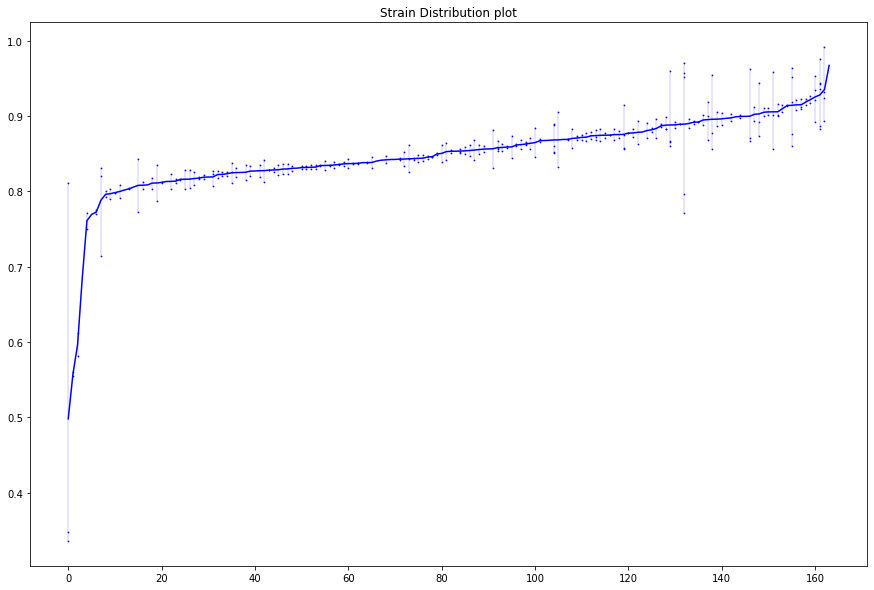

In [48]:
df = pd.DataFrame({"Filenames":files,"Strain":strains})
df.to_csv(os.path.join(basic_dir,'Variance Plot.csv'),index=False)

df = pd.DataFrame({"Filenames":files,"Strain":strains})
df = df[~(df.Strain=='[]')].reset_index()

def get_mean(string):
    x = string#get_arr(string)
    
    return np.mean(x)
def get_arr(string):
    #x = string.split('[')[1].split(']')[0].split(',')
    total = []
    for i in string:
        total.append(float(i))
    total.sort()
    return total
def outliers_and_insiders(x):
    if len(x)<3:
        return [x[0],x[-1]], []
    regular = [x[1],x[-1]]
    outliers = []
    for i in x:
        if i<regular[0] or i>regular[1]:
            outliers.append(i)
    return regular,outliers

df['mean_strain'] = df.Strain.apply(get_mean)

sorted_df = df[['Filenames','Strain','mean_strain']].sort_values('mean_strain').reset_index(drop=True)

plt.figure(figsize=(15,10))
plt.plot(sorted_df.index,sorted_df.mean_strain,color = 'blue')
plt.title("Strain Distribution plot")

# Plot Lines
points = []
missing = 0
for i in range(0,len(sorted_df.index)):
    x = get_arr(sorted_df.Strain[i])
    missing = 0
    if len(x)>=2:
        regular, outliers = outliers_and_insiders(x)
        # print(x,regular,outliers)
        #print(len(x))
        
        plt.plot([i-missing,i-missing],[x[0],x[-1]],linewidth=2,alpha=0.1,color='blue')
        for k in x:
            #if k > max([min(x),regular[0]]) and k < min([max(x),regular[1]]):
            plt.scatter(i,k,color='blue',s=0.5)
    else:
        missing+=1
    points.append(len(x))
plt.savefig(os.path.join(basic_dir,'Variance Plot.png'))

In [38]:
sorted_df

,Filenames,Strain,mean_strain
0,3UCTV2X1_17_EPIQ7C_NO_dilation0_downsample1_th...,"[0.4894714892712159, 0.507967045967049]",0.498719
1,3UCTV3EU_17_EPIQ7C_NO_dilation0_downsample1_th...,"[0.5016475288697785, 0.5242828999825723]",0.512965
2,418WJ5JZ_44_EPIQ7C_NO_dilation0_downsample1_th...,[0.6402605524047497],0.640261
3,3UTD6OIR_21_EPIQ7C_NO_dilation0_downsample1_th...,"[0.7263089602949, 0.7749452487587941]",0.750627
4,3WNIOOF8_29_EPIQ7C_NO_dilation0_downsample1_th...,"[0.7384195632434776, 0.764590566867753]",0.751505
...,...,...,...
161,2WTJWJTG_15_EPIQ7C_NO_dilation0_downsample1_th...,[],NaN
162,3UTC7ZBF_18_VividE95_dilation0_downsample1_thi...,[],NaN
163,418WDQVA_43_EPIQ7C_NO_dilation0_downsample1_th...,[],NaN
164,418WJDWH_44_EPIQ7C_NO_dilation0_downsample1_th...,[],NaN


In [28]:
reader_df = pd.read_csv("C:\\Users\\TheurerJ\\Documents\\Data\\Strain_Study_Reader.csv")

In [29]:
def calc_ratio(array,plot_dir=None,filename=None,vid=None,save = False,window_size = 3):
    if save:
        plt.clf()
        plt.plot(array,label = 'Raw Data',alpha=0.7)
    array = [array.tolist()[0]]+array.tolist()+[array.tolist()[-1]]
    array = moving_average(array,window_size)
    if save:
        plt.plot(array,label = 'Moving Average: '+str(window_size),alpha=0.7)
    x = scipy.signal.find_peaks(-np.array(array),distance=32)[0]
    ratios = []
    for i in range(0,len(x)):
        if save:
            plt.scatter(x[i],array[x[i]],color='green')
        #if i==len(x)-1:
        #    y = np.argmax(array[x[i]:])
        #else:
        #    
        delta = 16-(16-min([x[i],16]))
        y = np.argmax(array[max([x[i]-16,0]):min([x[i]+16,len(array)])])
        if save:
            plt.scatter(y+x[i]-delta,array[y+x[i]-delta],color='red')
        x_val = array[x[i]]
        y_val = array[y+x[i]-delta]
        ratios.append(x_val/y_val)
    if save:
        #plt.legend()
        plt.savefig(os.path.join(plot_dir,filename[:-3]+'png'))
        plt.clf()
    ratios.sort()
    return np.mean(ratios[1:-1])


In [30]:
import os
files = []
strains = []
 
for i in tqdm(os.listdir(os.path.join(basic_dir,'Excel'))):
    df = pd.read_csv(os.path.join(basic_dir,'Excel',i))
    x = calc_ratio(df.length)
    files.append(i)
    strains.append(x)
estimate = pd.DataFrame({"Filenames":files,"Strain":strains})
estimate.to_csv(os.path.join(basic_dir,'Strain.csv'),index=False)


  0%|                                                                                          | 0/154 [00:00<?, ?it/s]C:\Users\TheurerJ\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\TheurerJ\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|███████████████████████████████████████████████████████████████████████████████| 154/154 [00:00<00:00, 601.59it/s]


In [11]:
import matplotlib.pyplot as plt

In [12]:
from scipy.stats import linregress

In [13]:
min(estimate.Strain)

0.4998404758474351

In [15]:
import os
Filenames = []
Strain = []
for i in os.listdir(os.path.join(basic_dir,'Excel')):
    df = pd.read_csv(os.path.join(basic_dir,'Excel',i))
    Filenames.append(i)
    Strain.append(calc_ratio(df.length))



def find_id(x):
    return int(x.split('_')[1])
def find_machine(x):
    if x.split('_')[2] == 'EPIQ7C':
        return 'Philips'
    return 'GE'
estimate['ID'] = estimate.Filenames.apply(find_id)
estimate['Machine'] = estimate.Filenames.apply(find_machine)

estimate['Value'] = (estimate['Strain']-1)*100

print(estimate[estimate.Value<-40])
estimate = estimate[estimate.Value>-40]
#estimate = estimate[estimate.Value>-40]

                    Filenames    Strain  ID  Machine      Value
47  3UCTV2X1_17_EPIQ7C_NO.csv  0.591611  17  Philips -40.838889
48  3UCTV3EU_17_EPIQ7C_NO.csv  0.556328  17  Philips -44.367240
84  3WNIQZH1_30_EPIQ7C_NO.csv  0.499840  30  Philips -50.015952


In [16]:
col_1 = estimate[estimate.Machine == 'Philips'][['ID','Value']]
col_1 = col_1.groupby("ID")['Value'].mean()
col_1 = col_1.rename('Philips')
#col_1 = col_1.drop('Value',axis = 1)
col_2 = estimate[estimate.Machine == 'GE'][['ID','Value']]
col_2 = col_2.groupby("ID")['Value'].mean()
col_2 = col_2.rename('GE')
#col_2 = col_2.drop('Value',axis = 1)
estimations = pd.DataFrame({'Philips':col_1,'GE':col_2})

total = measure.join(estimations)
total.tail()
def elim(num):
    if num<-40:
        return None
    return num
total.Philips = total.Philips.apply(elim)
total

In [17]:
reader_df

,MRN,Philips 1,Philips 2,GE 1,GE 2
0,1,-15.3,-18.6,-13.0,-14.4
1,2,-22.7,-14.8,-17.8,-17.8
2,3,-19.1,-20.9,-15.9,-17.7
3,4,-24.2,-22.4,-17.9,-23.6
4,5,-18.1,-20.3,-17.8,-16.8
5,6,-19.2,-20.9,-17.0,-19.0
6,7,-9.7,-9.8,-4.6,-5.7
7,8,-14.3,-10.9,-9.6,-15.0
8,9,-19.6,-20.9,-18.8,-17.4
9,10,-18.9,-19.8,-14.5,-18.6


In [18]:
col_1 = estimate[estimate.Machine == 'Philips'][['Filenames','ID','Value']]
col_1 = col_1.groupby("ID")['Value'].count()

In [19]:
valid_indexs = col_1[col_1==6].index

In [20]:
len(valid_indexs)

1

In [21]:
attempt = estimate.set_index(['Machine','ID'])

In [24]:
x, y = [],[]
x_filename = []
y_filename = []
index_calculator = estimate.groupby(['Machine','ID']).count()[estimate.groupby(['Machine','ID']).count()==2].dropna().index
for dex in index_calculator:
    cat = attempt.loc[dex]
    x.append(cat.Value[0])
    x_filename.append(cat.Filenames[0])
    y.append(cat.Value[1])
    y_filename.append(cat.Filenames[1])

<ipython-input-24-aa5f7b1255b9>:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  cat = attempt.loc[dex]


Text(0.5, 1.0, 'Multiple readings of the same patient')

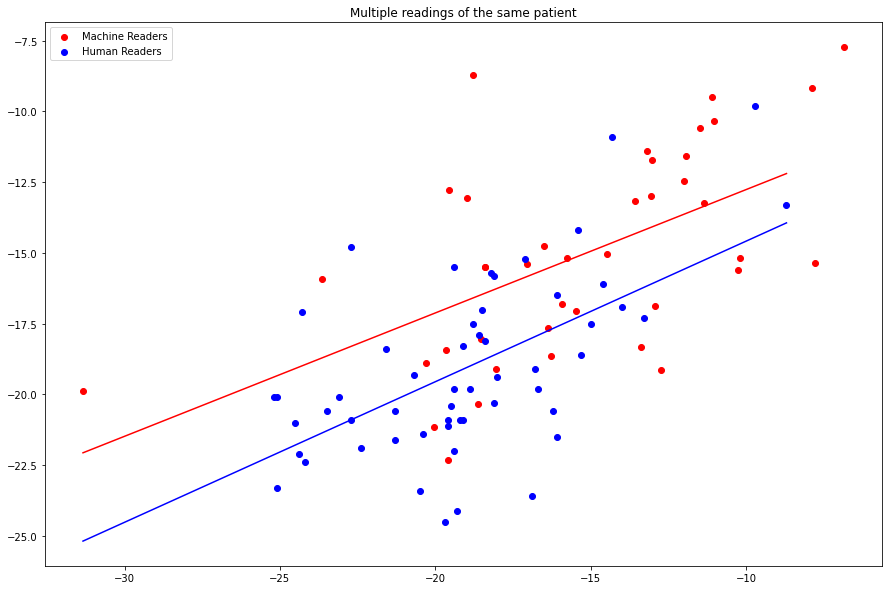

In [25]:
plt.figure(figsize=(15,10))
plt.scatter(x,y,color = 'red',label = 'Machine Readers')
calculated_regression = linregress(x,y)

plt.scatter(reader_df['Philips 1'],reader_df['Philips 2'],label = 'Human Readers',color = 'blue')
reader_regression = linregress(reader_df['Philips 1'],reader_df['Philips 2'])

x_axis = np.array([min(x),max(reader_df['Philips 1'])])

plt.plot(x_axis,np.array(x_axis)*calculated_regression[0]+calculated_regression[1],color='red')
plt.plot(x_axis,x_axis*reader_regression[0]+reader_regression[1],color = 'blue')
plt.legend()
plt.title("Multiple readings of the same patient")


In [ ]:
from statsmodels.graphics.agreement import mean_diff_plot

In [ ]:
plot = mean_diff_plot(np.array(x),np.array(y))

In [ ]:
computer_range = [-0.3-np.std(np.array(x)-np.array(y))*1.96,-0.3+np.std(np.array(x)-np.array(y))*1.96]

In [ ]:
plot = mean_diff_plot(reader_df['Philips 1'],reader_df['Philips 2'])

In [ ]:
human_range = [0.03-np.std(reader_df['Philips 1']-reader_df['Philips 2'])*1.96,0.03+np.std(reader_df['Philips 1']-reader_df['Philips 2'])*1.96]

In [ ]:
y

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#define Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(15,10))

#create simple line plot
ax.plot()

#add rectangle to plot
ax.add_patch(Rectangle((1, human_range[0]), 2, human_range[1]-human_range[0],color='blue',label='Human Limits of Agreement'))
ax.add_patch(Rectangle((4, computer_range[0]), 2, computer_range[1]-computer_range[0],color='red',label='Computer Limits of Agreement'))

ax.legend()
#display plot
plt.title("Bland-Altman Limits of Agreement")
plt.show()


In [ ]:
len(reader_df['Philips 1'])

In [ ]:
len(x)

In [ ]:
final = pd.DataFrame({"X Filename":x_filename,'X Strain':x,'Y Filename':y_filename,"Y Strain":y})

In [ ]:
final.to_csv('C:\\Users\\TheurerJ\\Documents\\John\\echonet_segmentation_analysis\\Segmentation Analysis\\Matched Computer Readers.csv')